In [26]:
from typing import Union
from pathlib import Path

import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

from src.utils import paths

In [27]:
def load_results(path: Union[str, Path]) -> dict:
    results = pd.read_csv(Path(path) / "metrics.csv")
    score = results["val/auroc"].max()
    return {"AUROC": score}


def load_model_selection_data(dataset: str, exp: str = "4-edge-aware") -> pd.DataFrame:
    rows = []

    root = paths.EXPS_DIR / dataset / exp / "train"
    for fold_dir in sorted(root.glob("fold_*")):
        fold_index = fold_dir.stem.split("_")[-1]
        for hparams_dir in sorted(fold_dir.glob("L=*")):
            params = hparams_dir.parts[-1].split("-")
            L, d, lr = [p.split("=")[1] for p in params]
            path = hparams_dir / "logs"
            data = {
                "Dataset": dataset.capitalize(),
                "Model": exp,
                "Fold": int(fold_index),
                "Number of layers": int(L),
                "Embedding dimension": int(d),
                "Learning rate": float(lr),
            } | load_results(path)
            rows.append(data)
            
    return pd.DataFrame(rows).sort_values(["Dataset", "Model", "Fold"]).reset_index(drop=True)


In [28]:
r_data = load_model_selection_data("robustness")
s_data = load_model_selection_data("sensitivity")
m_data = load_model_selection_data("monotonicity")

all_data = pd.concat([r_data, s_data, m_data], axis=0, ignore_index=True)
all_data

,Dataset,Model,Fold,Number of layers,Embedding dimension,Learning rate,AUROC
0,Robustness,4-edge-aware,0,10,128,0.0005,0.953080
1,Robustness,4-edge-aware,0,10,128,0.0010,0.952351
2,Robustness,4-edge-aware,0,10,128,0.0100,0.919950
3,Robustness,4-edge-aware,0,10,256,0.0005,0.951481
4,Robustness,4-edge-aware,0,10,256,0.0010,0.952833
...,...,...,...,...,...,...,...
670,Monotonicity,4-edge-aware,4,8,256,0.0010,0.849971
671,Monotonicity,4-edge-aware,4,8,256,0.0100,0.766139
672,Monotonicity,4-edge-aware,4,8,512,0.0005,0.859216
673,Monotonicity,4-edge-aware,4,8,512,0.0010,0.841745


,Dataset,Model,Fold,Number of layers,Embedding dimension,Learning rate,AUROC
459,Monotonicity,4-edge-aware,0,2,128,0.0005,0.724036
460,Monotonicity,4-edge-aware,0,2,128,0.0010,0.735748
461,Monotonicity,4-edge-aware,0,2,128,0.0100,0.725824
462,Monotonicity,4-edge-aware,0,2,256,0.0005,0.735796
463,Monotonicity,4-edge-aware,0,2,256,0.0010,0.737242
...,...,...,...,...,...,...,...
409,Sensitivity,4-edge-aware,4,10,256,0.0010,0.953501
410,Sensitivity,4-edge-aware,4,10,256,0.0100,0.935639
411,Sensitivity,4-edge-aware,4,10,512,0.0005,0.953507
412,Sensitivity,4-edge-aware,4,10,512,0.0010,0.945180


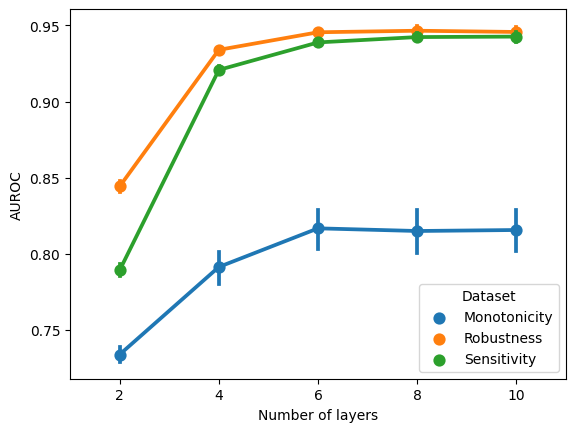

In [29]:
sort_order = ["Dataset", "Model", "Fold", "Number of layers", "Embedding dimension", "Learning rate"]
sns.pointplot(data=all_data.sort_values(sort_order), x="Number of layers", y="AUROC", hue="Dataset", )